### import libraries 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read the data

In [30]:
data = pd.read_csv(r"D:\Study\4 faculty\first term\Machine Learning\regression_data.csv", header=None, names=['X', 'Y'])

## Data exploration

In [31]:
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [32]:
data.info() # show data types of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
 1   Y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [33]:
data.describe() #show some statics values 

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='X', ylabel='Y'>

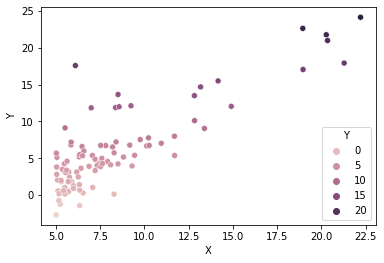

In [34]:
#show data
sns.scatterplot(data=data, x='X', y='Y',hue='Y')

<AxesSubplot:xlabel='Y', ylabel='Count'>

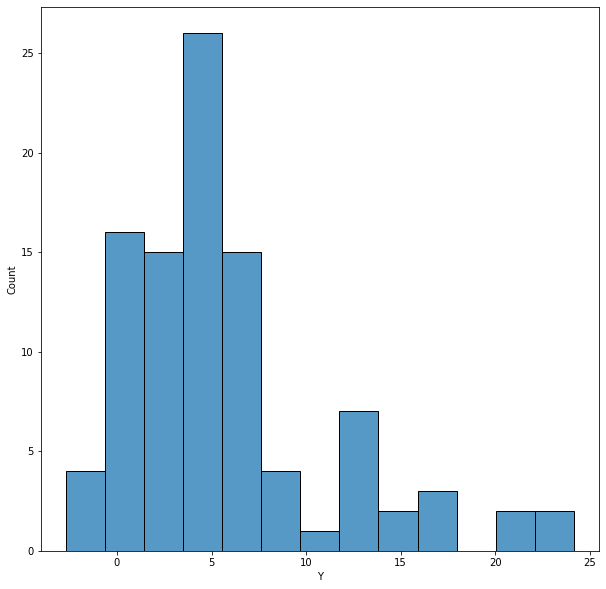

In [7]:
plt.figure(figsize=(10,10))
sns.histplot(data["Y"])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
 1   Y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [36]:
data.shape

(97, 2)

## operations on data

In [37]:
# adding a new column called X0 at column zero
data.insert(0, 'X0', 1) # base column


In [38]:
data.shape

(97, 3)

In [39]:
features = data.shape[1] # (97, 3) ->> features=3
X = data.iloc[:,0:features-1] # all rows , columns from 0 to (3-1) ->>2 but 2 is not included ={0,1}
y = data.iloc[:,features-1:features] # all rows , columns from (3-1) ->>2 to features{3} but 3 is not included = {2}

In [40]:
# convert matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) #initialize the theta with zeros

## cost function

In [41]:
# j(theta)=1/2*number_of_samples *sum(x*thata_transpose->(Y_hat(predicted output)) - y(real output))**2)
number_of_samples=data.shape[0]
def computeCost(X, y, theta):
    return np.sum(np.power(((X * theta.T) - y), 2))/number_of_samples

In [42]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) # (1*2) ->> temp is matrix (1*2) of zeros
    parameters = int(theta.ravel().shape[1]) # pramaters ->> 2
    cost = np.zeros(iters) # 1500 value of zeros
    theta_temp = np.zeros(epochs)
    theta_temp2 = np.zeros(epochs) #store old theta
    # theta_j=theta_j - alpha*1/number_of_samples*sum(x*thata_transpose->(Y_hat(predicted output)) - y(real output)) *x_j
    for i in range(iters):
        error = (X * theta.T) - y # error ->> (x*thata_transpose->(Y_hat(predicted output)) - y(real output))
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) ## error * values of pramter
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) # update theta
            theta_temp[i] =temp[0,0]
            theta_temp2[i] =temp[0,1]
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost,theta_temp,theta_temp2


In [43]:
alpha = 0.01  #learing rate
epochs = 1500 #number of iterations

In [44]:
theta, cost,thetas1,thetas2 = gradientDescent(X, y, theta, alpha, epochs)

print('theta = ' , theta)
print('cost  = ' , cost[0:50] )
print('computeCost = ' , computeCost(X, y, theta))
print('**************************************')

theta =  [[-3.63029144  1.16636235]]
cost  =  [13.47438093 11.86318714 11.80230941 11.79045717 11.78018989 11.77000832
 11.75986496 11.74975819 11.73968782 11.72965373 11.71965578 11.70969384
 11.69976778 11.68987748 11.6800228  11.67020362 11.6604198  11.65067123
 11.64095777 11.6312793  11.62163569 11.61202681 11.60245254 11.59291276
 11.58340735 11.57393617 11.5644991  11.55509603 11.54572682 11.53639137
 11.52708954 11.51782121 11.50858627 11.49938459 11.49021606 11.48108055
 11.47197794 11.46290812 11.45387098 11.44486638 11.43589421 11.42695437
 11.41804672 11.40917116 11.40032757 11.39151584 11.38273584 11.37398747
 11.3652706  11.35658514]
computeCost =  8.966776513175452
**************************************


In [45]:
x = np.linspace(data.X.min(), data.X.max(), 100)
f = theta[0, 0] + (theta[0, 1] * x) # h(x)= x0+x1 * theta 1 

Text(0.5, 1.0, 'X vs. Y')

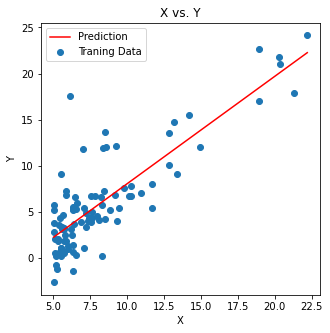

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.X, data.Y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y')


the predicted output = [[0.45197679]]


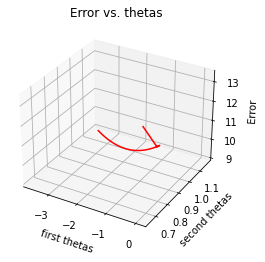

In [47]:
# draw error graph
fig = plt.figure()

ax = plt.axes(projection ='3d')
ax.plot3D(thetas1,thetas2, cost, 'r')
ax.set_xlabel('first thetas')
ax.set_ylabel('second thetas')
ax.set_zlabel('Error')
ax.set_title('Error vs. thetas')

print("the predicted output =",np.array([1,3.5])*theta.T)